In [1]:
# importing libraries
import xarray as xr
import geopandas as gpd
import numpy as np
import regionmask
from pyproj import CRS

In [2]:
# specifying paths
shapefile_path = "C:\jay projects\school\COMP 4560\CGC_Grain_Outcome_Predictions\src\MoistureSatelliteTest\shape files\Manitobas\Manitoba_Provincial_Boundary.shp"
netcdf_file_path = "C:\jay projects\school\COMP 4560\CGC_Grain_Outcome_Predictions\src\MoistureSatelliteTest\perfectDemo.nc"

In [3]:
mb_shapefile = gpd.read_file(shapefile_path)


In [4]:
mb_shapefile

,FID,AREA,PERIMETER,NAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,6.500534e+11,4.018512e+06,Manitoba,7.051045e+06,-1.980213e+12,"POLYGON ((-10553995.128 8315158.511, -10554250..."


In [5]:
# Match the netCDF CRS (EPSG:4326)
netcdf_crs = CRS.from_epsg(4326)

In [6]:
# Reproject the shapefile to match the netCDF CRS
mb_shapefile = mb_shapefile.to_crs(netcdf_crs)

In [7]:
mb_shapefile

,FID,AREA,PERIMETER,NAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,6.500534e+11,4.018512e+06,Manitoba,7.051045e+06,-1.980213e+12,"POLYGON ((-94.80815 59.61792, -94.81044 59.617..."


In [8]:
dataset = xr.open_dataset(netcdf_file_path)
latt = dataset.lat.values
lonn = dataset.lon.values

C:\Users\jaydo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [18]:
from shapely import Point
polygon_geometry = mb_shapefile.geometry[0]
# print(mb_shapefile)
# print(type(polygon_geometry))

points_in_polygon = []
sm_data = dataset['sm'].values

# for lat, lon in zip(latt.values, lonn.values):
for i in range(latt.size):
    lat = latt[i]
    for j in range(lonn.size):
        lon = lonn[j]
        # Create a Point object for each coordinate
        point = Point(lon, lat)

        # print(point, polygon_geometry.contains(point))

        if polygon_geometry.contains(point):

            sm = sm_data[0,i,j]

            # Store the information in a dictionary or perform desired actions
            point_info = {
                "latitude": lat,
                "longitude": lon,
                "soil_moisture": sm
            }
            points_in_polygon.append(point_info)

In [19]:
len(points_in_polygon)

1456

In [20]:
points_in_polygon

[{'latitude': 59.875, 'longitude': -101.875, 'soil_moisture': 0.12479188},
 {'latitude': 59.875, 'longitude': -101.625, 'soil_moisture': 0.122892335},
 {'latitude': 59.875, 'longitude': -101.375, 'soil_moisture': 0.1245582},
 {'latitude': 59.875, 'longitude': -101.125, 'soil_moisture': 0.12116471},
 {'latitude': 59.875, 'longitude': -100.875, 'soil_moisture': 0.11799866},
 {'latitude': 59.875, 'longitude': -100.625, 'soil_moisture': nan},
 {'latitude': 59.875, 'longitude': -100.375, 'soil_moisture': nan},
 {'latitude': 59.875, 'longitude': -100.125, 'soil_moisture': nan},
 {'latitude': 59.875, 'longitude': -99.875, 'soil_moisture': nan},
 {'latitude': 59.875, 'longitude': -99.625, 'soil_moisture': nan},
 {'latitude': 59.875, 'longitude': -99.375, 'soil_moisture': nan},
 {'latitude': 59.875, 'longitude': -99.125, 'soil_moisture': 0.116180696},
 {'latitude': 59.875, 'longitude': -98.875, 'soil_moisture': 0.10868254},
 {'latitude': 59.875, 'longitude': -98.625, 'soil_moisture': nan},
 {'l

True


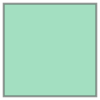

In [14]:
from shapely import Polygon

polygon = Polygon([[0, 0], [1, 0], [1, 1], [0, 1]])
p = Point(0.5, 0.5)

print(polygon.contains(p))

polygon